In [13]:
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Define una función para reemplazar los valores de 'ID_AV' según las condiciones.
def reemplazar_ID_AV(row):
    if row['TIPO_EP'] == 'PARQUE':
        return 'PK' + str(row['ID_AV'])
    elif row['TIPO_EP'] == 'PLAZA':
        return 'SQ' + str(row['ID_AV'])
    else:
        return row['ID_AV']

# scenario = 'ac'
for scenario in ['actual', 'future', 'utopic']:
    gdf = gpd.read_file(f'/app/data/AV_actuales_futuras_utopicas/{scenario}')
    av_cols = ['TIPO_EP', 'ID_AV', 'ID_PLACA', 'geometry']
    gdf = gdf[av_cols]
    gdf['ID_PLACA'].fillna(0, inplace=True)
    gdf['ID_AV'] = gdf.apply(reemplazar_ID_AV, axis=1)
    gdf.to_parquet(f'/app/assets/green_areas/{scenario}.parquet')

In [15]:
gdf = gpd.read_parquet(f'/app/assets/green_areas/actual.parquet')

In [12]:
nodes = [1,2,3]
destinations = [4,5,7,8,9,10]

In [18]:
import itertools
import pandas as pd

# Genera todas las combinaciones de nodos y destinos
combinations = list(itertools.product(nodes, destinations))

# Crea un DataFrame a partir de las combinaciones
df = pd.DataFrame(combinations, columns=['from', 'to'])

# Imprime el DataFrame resultante
display(df)

,from,to
0,1,4
1,1,5
2,1,7
3,1,8
4,1,9
5,1,10
6,2,4
7,2,5
8,2,7
9,2,8


: 

: 

In [1]:
import geopandas as gpd

In [14]:
gdf = gpd.read_parquet('/app/assets/green_areas/utopic.parquet')

In [16]:
gdf.to_file('/app/data/etiquetado/green_areas')

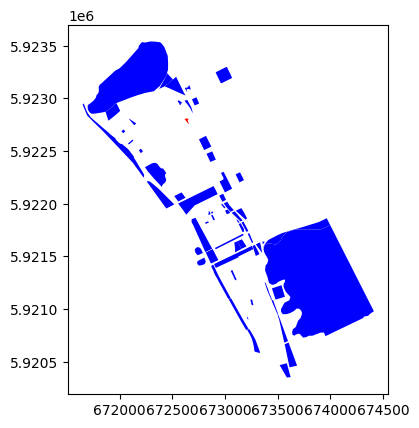

In [11]:
import matplotlib.pyplot as plt
# Crea un objeto ax de Matplotlib
fig, ax = plt.subplots()

# Trazar el primer GeoDataFrame en el ax
gdf[gdf['ID_AV']=='SQ6'].plot(ax=ax, color='red', label='GeoDataFrame 1')

# Trazar el segundo GeoDataFrame en el mismo ax
gdf[gdf['ID_AV']!='SQ6'].plot(ax=ax, color='blue', label='GeoDataFrame 2')

# Mostrar el gráfico
plt.show()